In [27]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

In [2]:
# Load point data
pumps = gpd.read_file('../../data/dani/Pumps.shp')
# Load building blocks
blocks = gpd.read_file('../../data/dani/polys.shp')
# Load street network
js = gpd.read_file('../../data/dani/streets_js.shp')

In [97]:
pumps.dtypes

Id             int64
geometry    geometry
dtype: object

In [108]:
type(pumps.iloc[0])

pandas.core.series.Series

In [109]:
type(pumps.iloc[[0],])

geopandas.geodataframe.GeoDataFrame

In [111]:
type(pumps.loc[0,'geometry'])

shapely.geometry.point.Point

<AxesSubplot:>

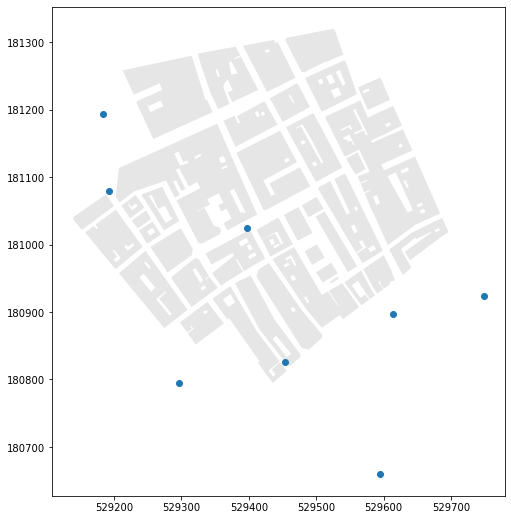

In [28]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax)

In [23]:
pumps.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°45'N to 61°N, 9°W to 2°E
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## Distance

Calculate distances to the Broad St. pump - but which one is it?

<AxesSubplot:>

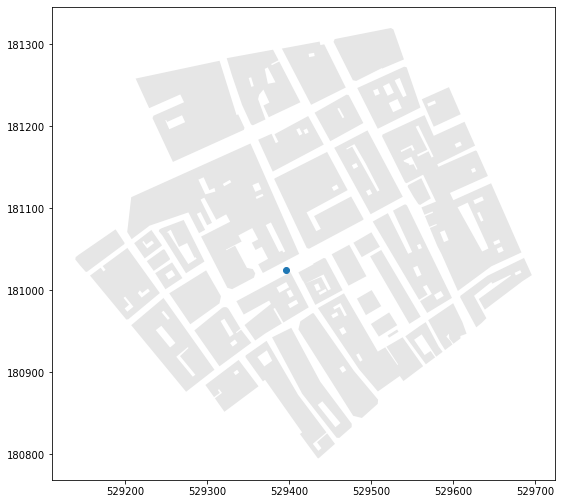

In [103]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.iloc[[0],].plot(ax=ax)   #https://stackoverflow.com/a/49323656

In [112]:
pumps.loc[0,'geometry'].distance(pumps.loc[1,'geometry'])

211.11179754252572

In [133]:
bs_pump = pumps.loc[0,'geometry']

for i in pumps['geometry']:
    print(bs_pump.distance(i))

0.0
211.11179754252572
271.53989398983026
366.52107965522873
251.78252434361087
206.73639507983233
414.51439043143967
251.16861852726475


## Buffer

In [45]:
pumps_buf=pumps.buffer(200)
type(pumps_buf)

geopandas.geoseries.GeoSeries

In [51]:
pumps_buf.iloc[0].area

125461.93962183727

In [52]:
3.1412 * 200**2

125648.0

<AxesSubplot:>

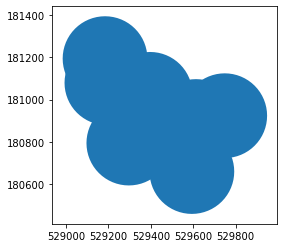

In [43]:
pumps_buf.plot()

<AxesSubplot:>

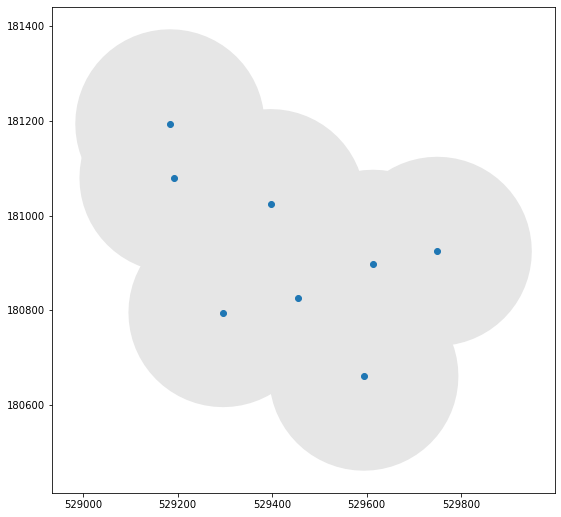

In [44]:
f, ax = plt.subplots(1, figsize=(9, 9))
pumps_buf.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax)